<a href="https://colab.research.google.com/github/vutunglam2510/Project_III/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phân loại ảnh ký tự tiếng Việt

### Hiển thị cấu hình máy Colab
Chọn sử dụng GPU:
Thời gian chạy => Thay đổi loại thời gian chạy => Trình tăng tốc phần cứng - Chọn GPU<br>
(Runtime => Change runtime => Hardware acceleration - Choose GPU)

In [ ]:
# GPU Tesla T4
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18402100872019696235, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5315380645851915131
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17536833946209980356
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4183847953585786239
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
# ~ 13GB RAM, ~ 9.6GB RAM free
!cat /proc/meminfo

MemTotal:       13333596 kB
MemFree:         9343220 kB
MemAvailable:   11883296 kB
Buffers:           82324 kB
Cached:          2484596 kB
SwapCached:            0 kB
Active:          1187428 kB
Inactive:        2411824 kB
Active(anon):     872408 kB
Inactive(anon):     8548 kB
Active(file):     315020 kB
Inactive(file):  2403276 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              1008 kB
Writeback:             0 kB
AnonPages:       1032420 kB
Mapped:           603884 kB
Shmem:              9156 kB
Slab:             171880 kB
SReclaimable:     125196 kB
SUnreclaim:        46684 kB
KernelStack:        4868 kB
PageTables:         9372 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666796 kB
Committed_AS:    3806428 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              944 kB
AnonHugePages:   

In [ ]:
#CPU Intel Xeon 2.20GHz
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

### Kết nối colab với Drive cá nhân

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Giải nén dữ liệu từ Drive vào máy Colab để load data nhanh hơn
Sau khi giải nén, data nằm ở đường dẫn /tmp/data trên máy colab

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Data/data.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

### import các thư viện cần dùng
**os**: đọc thư mục, **os.listdir()**: trả về danh sách các tệp, thư mục trong một đường dẫn<br>
**cv2**: opencv, đọc và xử lý ảnh<br>
**numpy**<br>
**train_test_split** trong sklearn.model_selection: chia ảnh và nhãn thành các tập train, test<br>
**np_utils** trong keras.utils: mã hóa one-hot cho nhãn với np_utils.to_categorical()<br>
Các tầng **Conv2D, Dense, AveragePooling2D, Flatten** trong keras.layers:<br>
**Conv2D**: tầng tích chập<br>
**Dense**: tầng kết nối đầy đủ<br>
**AveragePooling2D**: tầng pooling<br>
**Flatten**: đưa đầu vào thành đầu ra 1 chiều<br>
**SGD** trong keras.optimizers: giải thuật tối ưu Stochastic Gradient Descent<br>
**Sequential**: khởi tạo model<br>
**load_model**: load model đã lưu<br>
**time, timedelta**: ghi lại thời gian train, test, predict

In [ ]:
import os # to load data
import cv2 # opencv
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils # for one-hot encoding
import keras
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, AveragePooling2D, Flatten
from keras.optimizers import SGD
from time import time
from datetime import timedelta
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

### Đọc ảnh và nhãn theo thư mục vào 2 list trainX, trainY
Đọc vào ảnh đen trắng kích thước (28, 28), resize ảnh về kích thước (32, 32)<br>
os.listdir() trả về các đường dẫn không theo thứ tự tên

In [ ]:
nClasses = 190
dataPath = '/tmp/data/'
dataFolders = [str(i) for i in range(nClasses)]
trainX = []
trainY = []
for i in range(len(dataFolders)):
    print("Loading folder", i)
    charFolder = dataPath + dataFolders[i] + '/'
    charFiles = os.listdir(charFolder)
    y = int(dataFolders[i])
    for j in range(len(charFiles)):
        if j%100 == 0:
            print("Loaded", j)
        img = cv2.imread(charFolder+charFiles[j], cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (32, 32))
        trainX.append(img)
        trainY.append(y)

### Dữ liệu ví dụ của kí tự 'a'

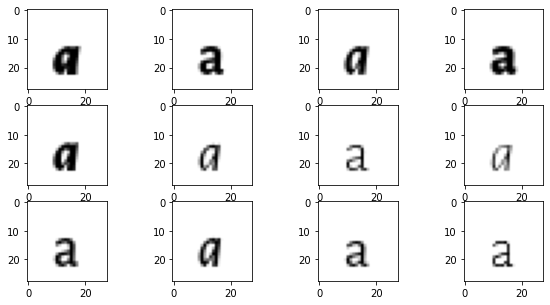

In [ ]:
nRows = 3
nCols = 4
dataPath = '/tmp/data/'
labels = '0'
plt.figure(figsize=(10,5))
for i in range(1, nRows*nCols+1):
    img = cv2.imread(dataPath + '0/' + str(i) + '.png', cv2.IMREAD_GRAYSCALE)
    plt.subplot(nRows, nCols, i)
    plt.imshow(img, cmap='gray')
plt.show()
# plt.savefig('/content/drive/My Drive/Deep_Learning/example.png', dpi=300)

###Chuyển trainX, trainY thành mảng numpy

In [ ]:
trainX = np.array(trainX)
trainY = np.array(trainY)

###Tổng số lượng ảnh là 105640, gồm 190 lớp, mỗi lớp 556 ảnh

In [ ]:
def print_n_images_per_class(y):
    classes, occurCount = np.unique(y, return_counts=True)
    nClasses = len(classes)
    for i in range(nClasses):
        print("Class {} has {} images".format(classes[i], occurCount[i]))
    print("The range of number of images: {}-{}".format(min(occurCount), max(occurCount)))
    # plt.plot(classes, occurCount)
    # plt.show()  

In [ ]:
nData = len(trainX)
print('Total number of images:', nData)
nClasses = len(np.unique(trainY))
print_n_images_per_class(trainY)

###Thêm một chiều cho tập ảnh để phù hợp với đầu vào cho tầng tích chập Conv2D
Khi đọc vào ảnh đen trắng có kích thước (32, 32), tập ảnh có kích thước (nData, 32, 32), thêm một chiều thành (nData, 32, 32, 1)<br>
Với ảnh màu RGB, khi đọc vào có kích thước (32, 32, 3), tập ảnh có kích thước (nData, 32, 32, 3)

In [ ]:
trainX = trainX.reshape(nData, 32, 32, 1)

###Chuẩn hóa các giá trị điểm ảnh về đoạn [0, 1]

In [ ]:
trainX = trainX.astype('float32')
trainX = trainX/255

###Chia dữ liệu thành 2 tập train, test với tỷ lệ tập test là 0.3
random_state là giá trị để các lần chạy khác nhau có kết quả chia ngẫu nhiên giống nhau

In [ ]:
trainX, testX, trainY, testY = train_test_split(trainX, trainY, \
                                                test_size=0.3, random_state=0)

In [ ]:
print('Total training images:', len(trainY))
print_n_images_per_class(trainY)

In [ ]:
print('Total testing images:', len(trainY))
print_n_images_per_class(testY)

Total testing images: 73948
Class 0 has 174 images
Class 1 has 164 images
Class 2 has 150 images
Class 3 has 182 images
Class 4 has 164 images
Class 5 has 165 images
Class 6 has 165 images
Class 7 has 170 images
Class 8 has 160 images
Class 9 has 155 images
Class 10 has 168 images
Class 11 has 163 images
Class 12 has 162 images
Class 13 has 168 images
Class 14 has 158 images
Class 15 has 182 images
Class 16 has 173 images
Class 17 has 170 images
Class 18 has 160 images
Class 19 has 159 images
Class 20 has 181 images
Class 21 has 174 images
Class 22 has 170 images
Class 23 has 167 images
Class 24 has 159 images
Class 25 has 151 images
Class 26 has 169 images
Class 27 has 173 images
Class 28 has 156 images
Class 29 has 169 images
Class 30 has 176 images
Class 31 has 155 images
Class 32 has 160 images
Class 33 has 173 images
Class 34 has 173 images
Class 35 has 177 images
Class 36 has 154 images
Class 37 has 164 images
Class 38 has 158 images
Class 39 has 153 images
Class 40 has 178 image

###Mã hóa one-hot cho các nhãn

In [ ]:
trainY = np_utils.to_categorical(trainY, nClasses)
testY = np_utils.to_categorical(testY, nClasses)

In [ ]:
testY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Khởi tạo model và thêm các tầng
padding='valid': không dùng padding

In [ ]:
LEARNING_RATE = 1e-2 #0.01

# Instantiate an empty model
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='tanh',input_shape=(32, 32, 1), padding='valid'))

# Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Convolutional Layer
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(190, activation='softmax'))

sgd = SGD(lr=LEARNING_RATE)

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [ ]:
EPOCHS = 100
BATCH_SIZE = 32
start = time()
model.fit(
    trainX, # training data
    trainY, # training targets
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)
finish = time()
print('Training time:', timedelta(seconds=finish-start))

Epoch 1/100
2311/2311 [==============================] - 7s 3ms/step - loss: 5.0116 - accuracy: 0.0250
Epoch 2/100
2311/2311 [==============================] - 7s 3ms/step - loss: 3.8798 - accuracy: 0.1450
Epoch 3/100
2311/2311 [==============================] - 7s 3ms/step - loss: 3.0983 - accuracy: 0.2775
Epoch 4/100
2311/2311 [==============================] - 7s 3ms/step - loss: 2.5879 - accuracy: 0.3710
Epoch 5/100
2311/2311 [==============================] - 7s 3ms/step - loss: 2.2111 - accuracy: 0.4477
Epoch 6/100
2311/2311 [==============================] - 7s 3ms/step - loss: 1.9231 - accuracy: 0.5101
Epoch 7/100
2311/2311 [==============================] - 7s 3ms/step - loss: 1.6954 - accuracy: 0.5613
Epoch 8/100
2311/2311 [==============================] - 7s 3ms/step - loss: 1.5094 - accuracy: 0.6090
Epoch 9/100
2311/2311 [==============================] - 7s 3ms/step - loss: 1.3538 - accuracy: 0.6493
Epoch 10/100
2311/2311 [==============================] - 8s 3ms/step - l

### Lưu lại model sau khi train

In [ ]:
modelName = 'model.h5'
model.save('/content/drive/MyDrive/Colab Notebooks/model_deep_learning/' + modelName)

### Load model đã lưu và predict

In [ ]:
modelName = 'model.h5'
model = load_model('/content/drive/MyDrive/Colab Notebooks/model_deep_learning/' + modelName)

In [ ]:
start = time()
predY = model.predict(testX)
finish = time()
print('Predicing time:', timedelta(seconds=finish-start))

Predicing time: 0:00:01.019503


Chuyển nhãn từ dạng one-hot về dạng số

In [ ]:
testY = testY.argmax(axis=1)

In [ ]:
predY = predY.argmax(axis=1)

###Độ chính xác khi dự đoán



In [ ]:
print(accuracy_score(testY, predY))

0.9592957213176827


###Load nhãn ký tự cho các lớp trong file csv
chars: list chứa các kí tự<br>
labels: dictionary với key là kí tự, value là nhãn lớp

In [ ]:
nClasses = 190
labelNames = open('/content/drive/MyDrive/Data/vi.characters.csv', encoding='utf-8').read().strip().split('\n')
labelNames = [label.split(',', 1)[0] + '.' + label.split(',', 1)[1] for label in labelNames]
chars = [label.split('.', 1)[1] for label in labelNames]
labels = {chars[i]: i for i in range(nClasses)}

In [ ]:
labelNames[:10]

['0.a', '1.à', '2.ả', '3.ã', '4.á', '5.ạ', '6.ă', '7.ằ', '8.ẳ', '9.ẵ']

In [ ]:
labels

{'!': 188,
 ',': 186,
 '.': 187,
 '0': 176,
 '1': 177,
 '2': 178,
 '3': 179,
 '4': 180,
 '5': 181,
 '6': 182,
 '7': 183,
 '8': 184,
 '9': 185,
 '?': 189,
 'A': 88,
 'B': 106,
 'C': 107,
 'D': 108,
 'E': 110,
 'F': 122,
 'G': 123,
 'H': 124,
 'I': 125,
 'J': 131,
 'K': 132,
 'L': 133,
 'N': 134,
 'O': 135,
 'P': 153,
 'Q': 154,
 'U': 155,
 'V': 167,
 'W': 168,
 'X': 169,
 'Y': 170,
 'a': 0,
 'b': 18,
 'c': 19,
 'd': 20,
 'e': 22,
 'f': 34,
 'g': 35,
 'h': 36,
 'i': 37,
 'j': 43,
 'k': 44,
 'l': 45,
 'n': 46,
 'o': 47,
 'p': 65,
 'q': 66,
 'u': 67,
 'v': 79,
 'w': 80,
 'x': 81,
 'y': 82,
 'À': 89,
 'Á': 92,
 'Â': 100,
 'Ã': 91,
 'È': 111,
 'É': 114,
 'Ê': 116,
 'Ì': 126,
 'Í': 129,
 'Ò': 136,
 'Ó': 139,
 'Ô': 141,
 'Õ': 138,
 'Ù': 156,
 'Ú': 159,
 'Ý': 174,
 'à': 1,
 'á': 4,
 'â': 12,
 'ã': 3,
 'è': 23,
 'é': 26,
 'ê': 28,
 'ì': 38,
 'í': 41,
 'ò': 48,
 'ó': 51,
 'ô': 53,
 'õ': 50,
 'ù': 68,
 'ú': 71,
 'ý': 86,
 'Ă': 94,
 'ă': 6,
 'Đ': 109,
 'đ': 21,
 'Ĩ': 128,
 'ĩ': 40,
 'Ũ': 158,
 'ũ':

In [ ]:
chars[:10]

['a', 'à', 'ả', 'ã', 'á', 'ạ', 'ă', 'ằ', 'ẳ', 'ẵ']

###Confusion Matrix
Các hàng là các nhãn lớp đúng, các cột là các nhãn lớp dự đoán

In [ ]:
cnf_matrix = confusion_matrix(testY, predY, normalize=None)

In [ ]:
cnf_matrix

array([[172,   1,   0, ...,   0,   0,   0],
       [  0, 162,   0, ...,   0,   0,   0],
       [  0,   0, 143, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 180,   0,   0],
       [  0,   0,   0, ...,   0, 159,   0],
       [  0,   0,   0, ...,   0,   0, 154]])

###Số ảnh bị sai theo mỗi lớp tính bằng Confusion Matrix

In [ ]:
def sortByValue(d):
    '''
    sort a dictionary by values
    '''
    return sorted(nErrorPerClass.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)

In [ ]:
nClasses = 190
error = dict()
for i in range(nClasses):
    error[chars[i]] = dict()

In [ ]:
nError = 0
nClasses = 190
nErrorPerClass = dict()
for i in range(nClasses):
    nErrorPerClass[chars[i]] = 0
    for j in range(nClasses):
        if i != j and cnf_matrix[i][j] > 0:
            errorij = cnf_matrix[i][j]
            nError += errorij
            nErrorPerClass[chars[i]] += errorij
            error[chars[i]][chars[j]] = errorij

Tổng số ảnh bị sai là tổng các phần tử không nằm trên đường chéo chính của ma trận

In [ ]:
nError

1290

Số ảnh bị dự đoán sai của mỗi lớp theo thứ tự giảm dần

In [ ]:
print(sortByValue(nErrorPerClass))

[('I', 47), ('Ấ', 40), ('O', 37), ('Ắ', 31), ('Ẵ', 29), ('Ề', 28), ('Ẩ', 28), ('0', 26), ('Ố', 25), ('Ế', 25), ('Ổ', 24), ('ầ', 22), ('Ồ', 21), ('Ể', 21), ('ố', 20), ('Ẫ', 20), ('Ầ', 20), ('l', 20), ('ẵ', 18), ('ấ', 18), ('ồ', 17), ('ẫ', 17), ('ề', 16), ('Ẳ', 15), ('y', 15), ('ẩ', 14), ('Ã', 14), ('ổ', 13), ('ế', 13), ('Ỏ', 12), ('ĩ', 12), ('ỵ', 11), ('Ị', 11), ('ỷ', 10), ('Ự', 10), ('Ằ', 10), ('Ă', 10), ('p', 10), ('Ử', 9), ('ị', 9), ('ẳ', 9), ('i', 9), ('Ờ', 8), ('ể', 8), ('ắ', 8), ('Đ', 8), ('!', 8), ('Ợ', 7), ('Ở', 7), ('Ớ', 7), ('ỉ', 7), ('Ễ', 7), ('ả', 7), ('ã', 7), ('É', 7), ('j', 7), ('Q', 7), ('1', 7), ('Ỗ', 6), ('Ỉ', 6), ('Ẻ', 6), ('Ặ', 6), ('Ê', 6), ('g', 6), ('Ỷ', 5), ('ử', 5), ('Ừ', 5), ('Ứ', 5), ('ợ', 5), ('ỡ', 5), ('Ộ', 5), ('Ọ', 5), ('ằ', 5), ('Ĩ', 5), ('ô', 5), ('â', 5), ('Í', 5), ('Ì', 5), ('È', 5), ('À', 5), ('x', 5), ('V', 5), ('J', 5), ('ỹ', 4), ('Ỳ', 4), ('ự', 4), ('Ữ', 4), ('ủ', 4), ('Ụ', 4), ('ờ', 4), ('Ả', 4), ('ạ', 4), ('ư', 4), ('Ư', 4), ('đ', 4), ('õ', 4), (

In [ ]:
error['0']

{'O': 11, 'o': 13, 'Ợ': 2}

Confusion Matrix Chuẩn hóa<br>
Confusion Matrix Chuẩn hóa thể hiện tỉ lệ ảnh được dự đoán đúng, sai so với tổng số ảnh của lớp đó. Tỉ lệ này thể hiện rõ hơn độ chính xác giữa các lớp, so với khi chưa chuẩn hóa, các lớp có tổng số lượng ảnh khác nhau, nhưng không thể hiện rõ trong ma trận. Khi chưa chuẩn hóa, số lượng ảnh dự đoán đúng (trên đường chéo chính) bằng nhau nhưng độ chính xác có thể khác nhau.

In [ ]:
norm_cnf_matrix = cnf_matrix = confusion_matrix(testY, predY, normalize='true')

In [ ]:
norm_cnf_matrix

array([[0.98850575, 0.00574713, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.98780488, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.95333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.97826087, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.95209581,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.98089172]])

### Hiển thị các ảnh sai của 1 lớp

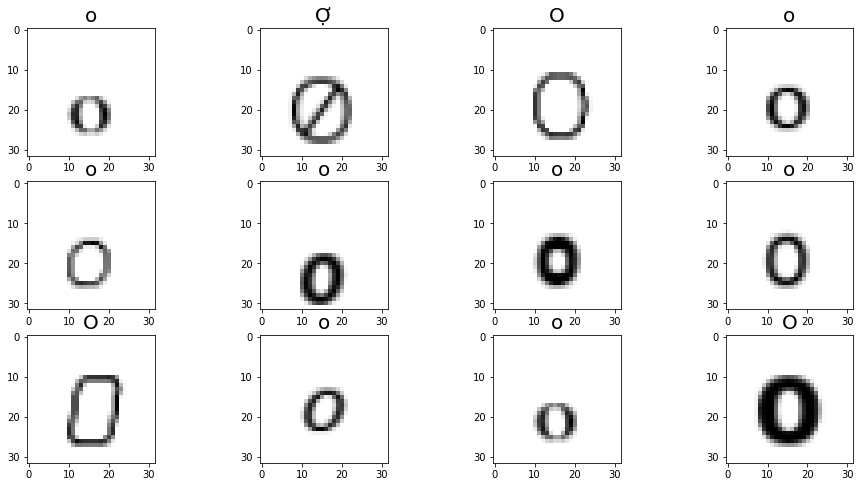

In [ ]:
MAX_IMAGES = 12
N_ROWS = 3
N_COLS = 4

char = '0'
index = -1
count = 0
plt.figure(figsize=(16,8))
for i,j in zip(testY, predY):
    index += 1
    true_char = chars[i]
    predict_char = chars[j]
    if i != j and true_char == char:
        count += 1
        if count > MAX_IMAGES:
            break
        plt.subplot(N_ROWS, N_COLS, count)
        plt.imshow(testX[index].reshape(32,32), cmap='gray')
        plt.title(predict_char, fontsize=20)
plt.show()

### Hiển thị dự đoán cho một ảnh

[[9.97919977e-01 2.72697624e-04 7.58275710e-05 6.02494256e-05
  7.54871653e-05 2.34995314e-04 6.00642079e-06 2.24504539e-08
  1.16462529e-08 2.94868201e-08 1.38263374e-08 2.47308634e-07
  1.94189328e-04 3.69998952e-06 4.93995958e-06 2.08302318e-08
  2.25822248e-07 6.95581434e-07 3.62799284e-08 9.92451099e-09
  5.64006274e-04 8.25609641e-06 6.54746998e-07 6.08309563e-08
  3.62367700e-08 6.06482615e-08 1.85678906e-09 2.09998419e-09
  4.75885678e-08 9.47131706e-09 2.18801047e-10 6.28973817e-11
  1.79705625e-11 1.42770778e-11 2.40933194e-11 1.25874221e-05
  2.62318878e-07 5.78587733e-10 1.16255521e-07 6.30015096e-10
  2.83775670e-10 2.82220580e-10 2.78916907e-12 3.47786716e-10
  6.29358432e-09 1.02027942e-09 1.84636410e-05 2.71561294e-05
  3.88237510e-07 5.57099398e-08 1.26926565e-07 7.88447778e-08
  1.52942352e-08 7.06206151e-08 2.01910471e-08 1.88601468e-09
  4.09998507e-10 5.14670662e-09 5.22991650e-10 2.89559994e-05
  2.08754341e-06 1.51544967e-07 3.52993857e-06 1.06166624e-06
  2.1505

Text(0.5, 1.0, 'a')

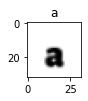

In [ ]:
dataPath = '/tmp/data/'
inp = []
img = cv2.imread(dataPath + '0/0.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (32, 32))
inp.append(img)
inp = np.array(inp)
inp = inp.reshape(1, 32, 32, 1)
inp = inp.astype('float32')
inp = inp/255

pred = model.predict(inp)
print(pred)
pred = pred.argmax(axis=1)
print(pred)
plt.figure(figsize=(1,1))
plt.imshow(inp.reshape(32,32), cmap='gray')
charPred = chars[pred[0]]
plt.title(charPred)